---

## Linear Regreesion Algorithm and Applications
#### Language: Python 3.8.8
#### Author: Tianjian Sun

---

### Table of Contents

* [Introduction](#Introduction)
* [Algorithm](#Algorithm)
  * [Model](#Algorithm)
  * [Prediction Evaluation](#Evaluation)
  * [*F* test](#F)
  * [*t* test](#t)
* [Illustration](#Illustration)
* [Advantages and Disadvantages](#Advantages_and_Disadvantages)
    * [Advantages](#Advantages)
    * [Disadvantages](#Disadvantages)
* [Hard code of linear regression](#Code)
* [Applications on data sets](#Applications)
    * [Ethereum (ETH) price data](#ETH)
    * [Diabetes data](#Diabetes)

---
### Introduction <a class="anchor" id="Introduction"></a>
In this section we focus on a straight-forward and classic statistical model, linear regreesion (LR). The main idea of linear regression is to use a linear predictor function whose unknown model parameters are estimated from the data. 

(Least squares) linear regreesion is a classic and old supervised model, back to 1800's, finding a good rough linear fit to a set of points was performed by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) (1805) and [Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) (1809) for the prediction of planetary movement. 

Linear regreesion is widely used in most regression tasks, variance analysis, and dependence analysis, and it plays an important role in the subfield of machine learning. The linear regression algorithm is one of the fundamental supervised machine-learning algorithms due to its relative simplicity and well-known properties.


---

### Algorithm <a class="anchor" id="Algorithm"></a>

Assume we have an input data set (column vector) $\textbf{X} = (\textbf{x}_1^T, \textbf{x}_2^T, \cdots, \textbf{x}_n^T)$, where $\textbf{x}_i^T = (x_{i1}, x_{i2}, \cdots, x_{ip}) \in \textbf{R}^p$, and want to predict a real-valued output data set (column vector) $\textbf{y} = (y_1, y_2, \cdots, y_n)$ . The linear regression model has the form

$$
y_i = \beta_0 + \sum_{j=1}^{p} {\beta_j x_{ij}} + \epsilon_i 
$$

Here the $\beta_j’s$ are unknown parameters or coefficients of corresponding input.

To simplify the equation, usually a column of $1$'s are added to the input data matrix, where $\textbf{x}_i^T = (1, x_{i1}, x_{i2}, \cdots, x_{ip})$, and the linear equation becomes

$$
y_i = \textbf{x}_i^T \boldsymbol{\beta} + \epsilon_i
$$

Often these n equations are stacked together and written in a matrix form

$$
\textbf{y} = \textbf{X} \boldsymbol{\beta} + \epsilon
$$

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation. 

The most popular estimation method is least squares, in which we pick the coefficients $\boldsymbol{\beta} = (\beta_0, \beta_1, . . ., \beta_p)^T$, which minimizes the residual sum of squares

$$
RSS(\boldsymbol{\beta}) = \sum_{i=1}^n {\epsilon_i^2} =\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p} {\beta_j x_{ij}})^2
$$

This criterion makes sense if the observations $(\textbf{x}_i, y_i)$ are independent and identically distributed (iid), which means that they are and randomly drawn from the population.


To minimize $RSS(\boldsymbol{\beta})$, first we make the following assumptions:
* $E[\epsilon_i]=0$, i.e., $E[y_i]=\textbf{x}_i^T \boldsymbol{\beta}$
* $Var[\epsilon_i] = \sigma^2 < \infty$ (homoscedasticity)
* $Cov[\epsilon_i, \epsilon_j]=0$ for $\forall i \neq j$, i.e., $\epsilon_i, \epsilon_j$ are uncorrelated,
and $\epsilon_i$ do not depend on $x_i$ .



Rewrite it to matrix form
$$
RSS(\boldsymbol{\beta}) = (\textbf{y}-\textbf{X}\boldsymbol{\beta})^T (\textbf{y}-\textbf{X}\boldsymbol{\beta})
$$

Notice that it's a quadratic function with $p+1$ paraeters, take the partial derivative w.r.t $\boldsymbol{\beta}$, we have

$$
\frac{\partial RSS} {\partial \boldsymbol{\beta}} = -2 \textbf{X}^T (\textbf{y}-\textbf{X}\boldsymbol{\beta})
$$

$$
\frac{\partial^2 RSS} {\partial \boldsymbol{\beta} \partial \boldsymbol{\beta}^T} = -2 \textbf{X}^T \textbf{X}
$$

Assume that $\textbf{X}$ is fully ranked, i.e., $n>p$, then $\textbf{X}^T \textbf{X}$ is positive definite. Set the first partial derivative to $0$, we have
$$
\textbf{X}^T (\textbf{y}-\textbf{X}\boldsymbol{\beta}) = \textbf{0}
$$

And the solution is 
$$
\hat{\boldsymbol{\beta}} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}
$$

Note that only when $\textbf{X}$ is fully ranked does the inverse of $\textbf{X}^T \textbf{X}$ exist.

Thus the fitted values of the training inputs are given by

$$
\hat{\textbf{y}} = \textbf{X} \hat{\boldsymbol{\beta}} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}
$$

To make a prediction given an unobserved input vector $\textbf{x}_0$

$$
\hat{y} = (1, \textbf{x}_0)^T \hat{\boldsymbol{\beta}}
$$

#### Prediction Evaluation <a class="anchor" id="Evaluation"></a>
For regression problems, we usually use root mean square error (RMSE) and coefficient of determination ($R^2$) to estimate our linear regression model. 

The formula of $RMSE$ is given by
$$
RMSE = \sqrt{\frac{\sum_{i=1}^n {(y_i-\hat{y}_i)^2}}{n}}
$$

$R^2$ is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). It's defined as follows
$$
R^2 = \frac{SSR} {SST} = 1 - \frac{SSE} {SST}
$$
where $SSE$ is the sum of squares of residuals
$$
SSE = \sum_{i=1}^n {(y_i-\hat{y}_i)^2}
$$
and $SST$ is the total sum of squares
$$
SS_{tot} = \sum_{i=1}^n {(y_i-\bar{y}_i)^2}
$$

#### *F* test <a class="anchor" id="F"></a>
Also we can test the model and coefficients using *F* and *t* statistics. 

*F* test is used for the following hypothesis testing

$H_0: \beta_1 = \cdots = \beta_p = 0$

$H_1$: at least one $\beta_j \neq 0$

And the *F* statistic is
$$
F = \frac{MSR} {MSE}
$$
where
$$
MSR = \frac{SSR} {p-1}
$$
$$
MSE = \frac{SSE} {n-p}
$$

tends to have larger absolute values when at least for one $\beta_j \neq 0$. Thus $H_0$ cannot be rejected if $F>1$.

#### *t* test <a class="anchor" id="t"></a>

*t* test is used for significance of coefficients

$H_0: \beta_j = 0$

$H_1: \beta_j \neq 0$

And the *t* statistic 
$$
t = \frac{\beta_j - 0} {SE(\beta_j)}
$$
tends to have larger values when $\beta_j \neq 0$, thus $H_0$ cannot be rejected.

---

### Illustration <a class="anchor" id="Illustration"></a>

Take a look at the two-dimension space, by Sewaqu ([link](https://commons.wikimedia.org/w/index.php?curid=11967659)), we can have a intuitive idea about how linear regression works.

Let the input data $\textbf{X}$ be in one-dimensional space, i.e., $\textbf{X} = (x_1, x_2, \cdots, x_n)$, and corresponding output be $\textbf{y}=(y_1, y_2, \cdots, y_n)$. The $y-x$ scatter plot is below, and the red line represents the OLS regression line. It's intuitive that the linear regression line "goes cross" all data points, and shows the linear trend of how output goes as input changes.

![lr_illu](images/Linear_regression.svg)

---

### Advantages and Disadvantages <a class="anchor" id="Advantages_and_Disadvantages"></a>

#### Advantages: <a class="anchor" id="Advantages"></a>

* Best linear unbiased estimator. The least square estimator of linear regression model has great properties. By the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem), the ordinary least squares (OLS) regression produces unbiased estimates that have the smallest variance of all possible linear estimators. This property is called BLUE (Best Linear Unbiased Estimator).

* Simple model. The Linear regression model is the simplest equation using which the relationship between the multiple predictor variables and predicted variable can be expressed, and the ordinary least squares error function is also very simple and straight-forward.

* Computationally friendly. The modeling speed of linear regression is fast as it does not require complicated calculations and runs predictions fast when the amount of data is large.

* Great interpretability of the output. The ability of linear regression to determine the relative influence of one or more predictor variables to the predicted value when the predictors are independent of each other is one of the key reasons of the popularity of linear regression. The model derived using this method can express the what change in the predictor variable causes what change in the predicted or target variable.


#### Disadvantages: <a class="anchor" id="Disadvantages"></a>

* Overly-Simplistic. The linear regression model is too simplistic to capture real world complexity. The linear regression assumes a linear relationship between independent variables and dependent variable, which cannot represent more complex relationships in real world. 

* Independence of variables. Assumes that the predictor variables are not correlated which is rarely true. It is important to, therefore, remove multicollinearity (using dimensionality reduction techniques) because the technique assumes that there is no relationship among independent variables. In cases of high multicollinearity, two features that have high correlation will influence each other’s weight and result in an unreliable model.

* Homoscedasticity. The linear regression model assumes that independent variables can represent all expectation and variance of dependent variable (so that $E[\epsilon_i]=0$ and $Var[\epsilon_i] = \sigma^2$), which is always not true because in real world it's hard for people to find exactly all independent variables that affect the dependent variable. Usually people will have input that are dependent and insufficient.

---

### Hard code of linear regression <a class="anchor" id="Code"></a>

#### All packages used in this notebook
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [scipy](https://scipy.org/)
* [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/)
* [plotly](https://plotly.com/)
* [statsmodels](https://www.statsmodels.org/stable/index.html)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader as web
import plotly.express as px
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### function of linear regression model

In [2]:
class linear_regression():
    def __init__(self):
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.beta_hat = None
        self.y_hat = None

    # model fitting
    def fit(self, X, y, bias=True):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()

        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)

        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias

        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
        self.beta_hat = beta_hat
        self.y_hat = X @ beta_hat

    # predict new data
    def predict(self, x):
        if self.bias:
            ones_column = np.ones((x.shape[0], 1))
            x = np.append(ones_column, x, axis=1)
        return x @ self.beta_hat

    # function of sum of squared errors
    def SSE(self):
        return (self.y-self.y_hat).T@(self.y-self.y_hat)
    
    # function of mean squared errors
    def MSE(self):
        return self.SSE()/(self.n-self.p)

    # function of sum of squares regression
    def SSR(self):
        return (self.y_hat - np.mean(self.y)).T @ (self.y_hat - np.mean(self.y))

    # function of mean squared regression
    def MSR(self):
        return self.SSR()/(self.p-1)

    # function of sum of squares total
    def SST(self):
        return (self.y-np.mean(self.y_hat)).T@(self.y-np.mean(self.y_hat))

    # function of coefficient of determination
    def R_2(self):
        return 1 - self.SSE()/self.SST()

    # function of coefficient of determination on test data
    def pred_R_2(self, input, true):
        pred = self.predict(input)
        pred_SSE = (true-pred).T@(true-pred)
        pred_SST = (true-np.mean(pred)).T@(true-np.mean(pred))
        return 1 - pred_SSE/pred_SST

    # function of adjusted coefficient of determination
    def adj_R_2(self):
        return 1- (1-self.R_2())*(self.n-1)/(self.n-self.p-1)

    # function of standard deviation of coefficients
    def sd_coef(self):
        return np.sqrt(np.diagonal(self.MSE() * np.linalg.inv(self.X.T @ self.X)))

    # function of t statistic and p-value
    def t_stat(self):
        t = self.beta_hat / self.sd_coef()
        t_p = [2*(1-stats.t.cdf(np.abs(i), (self.n-self.p-1))) for i in t]
        return t, t_p

    # function of F statistic and p-value
    def F_stat(self):
        F = self.MSR()/self.MSE()
        df_1 = self.p - 1
        df_2 = self.n - self.p
        #find p-value of F test statistic 
        F_p = 1-stats.f.cdf(F, df_1, df_2) 
        return F, F_p

    # function of root mean square error
    def RMSE(self, input, true):
        pred = self.predict(input)
        return np.sqrt((true-pred).T@(true-pred)/len(true))

    # function of model summary
    def summary(self):
        coef_df = pd.DataFrame()
        
        coef_df['Estimate'] = self.beta_hat
        coef_df['Std.Error'] = self.sd_coef()
        coef_df['t value'] = self.t_stat()[0]
        coef_df['Pr(>|t|)'] = self.t_stat()[1]
        coef_df.index = ['Intercept'] + list(self.variables)

        print(coef_df)

        print(f"Residual standard error: {round(np.sqrt(self.MSE()), 3)} on {self.n-self.p} degress of freedom.")
        print(f"R-squared: {round(self.R_2(), 3)}, Adjusted R-square: {round(self.adj_R_2(), 3)}")
        f_stat_str = f"F-statistic: {round(self.F_stat()[0], 3)} on {self.p - 1} and {self.n - self.p} DF,"
        f_p_str = f"p-value: {round(self.F_stat()[1], 3)}"
        print(f_stat_str + f_p_str)
        

---

### Applications on data sets <a class="anchor" id="Applications"></a>

* Ethereum (ETH) price data
* Diabetes data



---
#### Ethereum (ETH) price data <a class="anchor" id="ETH"></a>
---

First we apply our linear regression model on predicting the price of Ethereum. [Ethereum](https://en.wikipedia.org/wiki/Ethereum) (by wikipedia) is a decentralized, open-source blockchain with smart contract functionality. Ether (ETH) is the native cryptocurrency of the platform. Amongst cryptocurrencies, Ether is second only to Bitcoin in market capitalization. 

Nowadays prices of Ethereum and other cryptocurrencies are increasing rapidly, so they are becoming more and more popular among traders and investors.

In this problem we focus on predicting future ETH price using history ETH prices from *pandas_datareader*. And we use *plotly* to plot nice figures.



First we take a look at the ETH price in USD from Jan to Nov, 2021.

In [3]:
data = web.DataReader('ETH-USD',
                     'yahoo',
                     start = '2021-01-01',
                     end = '2021-11-30')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


Let us set our goal: to predict close price. Plot the close price curve of ETH.

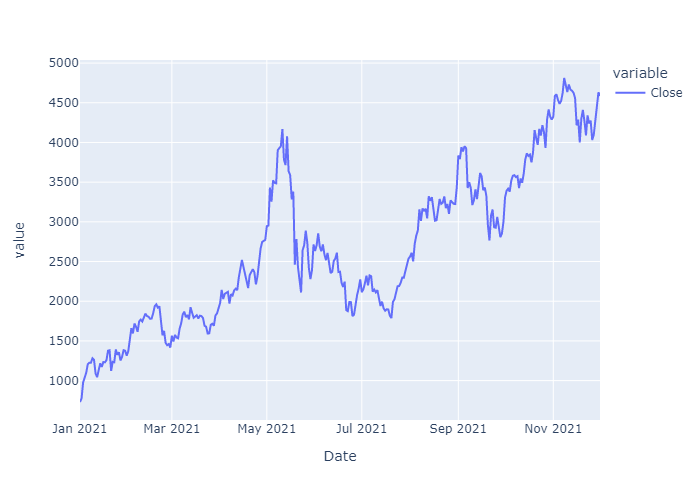

In [4]:
all_df = pd.DataFrame(data['Close'])

fig = px.line(all_df)
fig.show("png")

Oh, looks like ETH grows a lot in 2021.

We want to use the close prices of the past 1 to 7 days to predict close price of the current day. First we use *shift* method to get past data.

In [5]:
for i in range(1, 8):
    all_df[f'lag_{i}'] = all_df['Close'].shift(i)
    
all_df.head(10)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-01,730.367554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN
2021-01-04,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN
2021-01-05,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN
2021-01-06,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN
2021-01-07,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973


Drop all *NaN*s, and create our input and output data, using the first 6 months to train our linear regression model.

In [6]:
all_df.dropna(inplace=True)
cols = [f'lag_{i}' for i in range(1, 8)]

train_df = all_df.iloc[0:181-7, :]
train_df.head(5)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104


In [7]:
X = train_df[cols]
y = train_df['Close']

Train LR model using our hard code.

In [8]:
model = linear_regression()
model.fit(X, y)

Take a look at the details of our model. Summarize the coefficients and their standard deviations, t-values, p-values, residual standard error, r-square and adjusted r-square, f-statistic and its p-value of the LR model.

In [9]:
model.summary()

            Estimate  Std.Error    t value  Pr(>|t|)
Intercept  71.691203  37.717697   1.900731  0.059081
lag_1       0.847193   0.076506  11.073502  0.000000
lag_2       0.246981   0.098819   2.499337  0.013420
lag_3      -0.077644   0.100094  -0.775707  0.439032
lag_4      -0.005219   0.100285  -0.052042  0.958558
lag_5      -0.135197   0.100261  -1.348448  0.179362
lag_6       0.264233   0.098910   2.671449  0.008309
lag_7      -0.172057   0.076188  -2.258329  0.025235
Residual standard error: 150.265 on 166 degress of freedom.
R-squared: 0.952, Adjusted R-square: 0.95
F-statistic: 474.452 on 7 and 166 DF,p-value: 0.0


The LR model has a really good prediction result! Both R-squared and Adjusted R-square are high, representing a good prediction. 

Also from the above table, we find that given a significance level of $0.05$, *lag_1*, *lag_6* and *lag_7* (which are 1, 6 and 7 days before, respectively) are significant, showing that these three variables are significantly important in the LR model.

Take a look at the RMSE of training data.

In [10]:
RMSE = model.RMSE(X, y)
print(f"The RMSE of training data is: {round(RMSE, 3)}")

The RMSE of training data is: 146.77


Not bad on such a large data set.

Take a look at the model prediction on the train input, and compare with the true prices in one figure.

C:\Users\91208\AppData\Local\Temp/ipykernel_868/1067073633.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



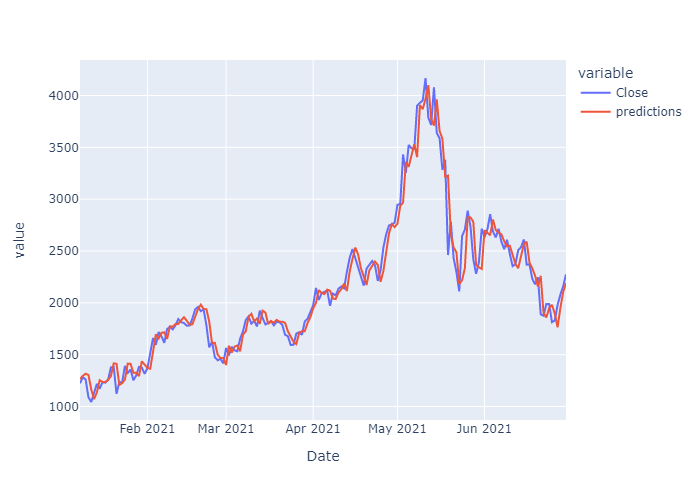

In [11]:
train_df['predictions'] = model.predict(X)
fig = px.line(train_df, y=['Close', 'predictions'])

fig.show("png")

An amazing prediction curve! Looks like the linear regression can estimate the future close price of ETH very well! But also notice that there is an obvious "late" in the prediction curve, compared with the true curve. Thus it's not a good idea to use this curve for short-term (in a period of days) investments, but it is useful for long-term investments.

Further, let's do some predictions on test data (ETH prices from Jul to Nov).

In [12]:
test_df = all_df.iloc[181-7:, :]
test_df.head(5)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-07-01,2113.605469,2274.547607,2160.768311,2079.657471,1978.894653,1829.239258,1813.217285,1988.456299
2021-07-02,2150.040283,2113.605469,2274.547607,2160.768311,2079.657471,1978.894653,1829.239258,1813.217285
2021-07-03,2226.114258,2150.040283,2113.605469,2274.547607,2160.768311,2079.657471,1978.894653,1829.239258
2021-07-04,2321.724121,2226.114258,2150.040283,2113.605469,2274.547607,2160.768311,2079.657471,1978.894653
2021-07-05,2198.582520,2321.724121,2226.114258,2150.040283,2113.605469,2274.547607,2160.768311,2079.657471


In [13]:
test_X = test_df[cols]
test_y = test_df['Close']
pred_test_y = model.predict(test_X)

First take a look at the RMSE.

In [14]:
test_RMSE = model.pred_R_2(test_X, test_y)
print(f"The RMSE of test data is: {round(test_RMSE, 3)}")

The RMSE of test data is: 0.964


Looks pretty good! Let's plot it with the true price curve.

C:\Users\91208\AppData\Local\Temp/ipykernel_868/1424968874.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



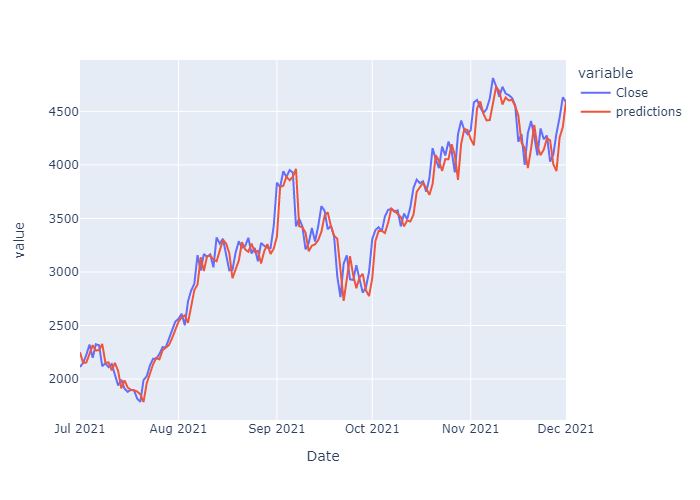

In [15]:
test_df['predictions'] = pred_test_y
fig = px.line(test_df, y=['Close', 'predictions'])

fig.show("png")

Nice result. From now on we can earn lots of money by predicting the ETH price! (lLl, but result in this file shall NOT be considered to be investing, accounting, consulting or any other professional advice.)

Finally, just have a quick check that my hard code works rightly. We train another LR model using package *statsmodels*, and compare the result with my previous model.


In [16]:
X_n = sm.add_constant(X)
sm.OLS(y, X_n).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     474.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          3.09e-106
Time:                        11:20:43   Log-Likelihood:                -1115.0
No. Observations:                 174   AIC:                             2246.
Df Residuals:                     166   BIC:                             2271.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6912     37.718      1.901      0.059      -2.777     146.159
lag_1          0.8472      0.077     11.074      0.000       0.696       0.998
lag_2          0.2470      0.099      2.499      0.013       0.052       0.442
lag_3         -0.0776      0.100     -0.776      0.439      -0.275       0.120
lag_4         -0.0052      0.100     -0.052      0.959      -0.203       0.193
lag_5         -0.1352      0.100     -1.348      0.179      -0.333       0.063
lag_6          0.2642      0.099      2.671      0.008       0.069       0.460
lag_7         -0.1721      0.076     -2.258      0.025      -0.322      -0.022
==============================================================================
Omnibus:                       30.510   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.067
Skew:                          -0.323   Prob(JB):                     1.96e-42
Kurtosis:                       8.106   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks that all results are the same, so my code works well. 

---
#### Diabetes data <a class="anchor" id="Diabetes"></a>
---

Second we apply our linear regression model on diabetes data. [Diabetes](https://www.cdc.gov/diabetes/basics/diabetes.html) (by CDC) is a chronic (long-lasting) health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. 

In the [diabetes data](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) from *sklearn*, ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Load the *diabetes* data and have a quick look.

In [17]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Note that Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

In [18]:
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Split data into training and test data sets and train a LR model using our hard code.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=24)

In [20]:
model = linear_regression()
model.fit(X_train, y_train)

Take a look at the summary of our model.

In [21]:
model.summary()

             Estimate   Std.Error    t value      Pr(>|t|)
Intercept  151.221034    2.865526  52.772517  0.000000e+00
age        -34.703300   66.896023  -0.518765  6.042613e-01
sex       -263.164098   67.627700  -3.891365  1.198841e-04
bmi        567.075768   72.627537   7.807999  7.216450e-14
bp         298.643461   72.274543   4.132070  4.528349e-05
s1        -746.260413  446.228104  -1.672374  9.536775e-02
s2         490.519076  360.879860   1.359231  1.749716e-01
s3          37.683045  226.007501   0.166734  8.676785e-01
s4          81.106327  176.150298   0.460438  6.454952e-01
s5         729.102857  187.319340   3.892299  1.194433e-04
s6          97.144956   73.599031   1.319922  1.877465e-01
Residual standard error: 53.692 on 342 degress of freedom.
R-squared: 0.534, Adjusted R-square: 0.519
F-statistic: 39.215 on 10 and 342 DF,p-value: 0.0


The LR model has a bad prediction result. Both R-squared and Adjusted R-square are about 0.5, representing a bad prediction, so here LR is not a good model to predict the target. 

And from the above table, we find that given a significance level of $0.05$, *sex*, *bmi*, *bp* and *s5* are significant, showing that these four variables are significantly important in the LR model.

Take a look at the RMSE of training data.

In [22]:
RMSE = model.RMSE(X_train, y_train)
print(f"The RMSE of training data is: {round(RMSE, 3)}")

The RMSE of training data is: 52.849


Take a look at the model prediction on the train input, and compare them with the true prices in one figure.

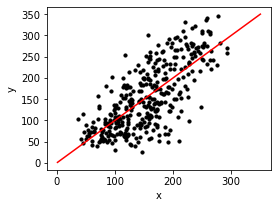

In [40]:
predictions = model.predict(X_train)

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(predictions, y_train, color ='black', s=10)
ax.plot([1, 2, 4, 350], [1, 2, 4, 350], 'r-')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

The *prediction-true* value figure also shows that predictions are not close to true values, as the points are far from the $y=x$ line.

Let's drop other variables and only use the significant variables, which are *sex*, *bmi*, *bp* and *s5*, and rebuild our LR model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X[['sex', 'bmi', 'bp', 's5']], diabetes_y, test_size=0.2, random_state=24)

model = linear_regression()
model.fit(X_train, y_train)
model.summary()

             Estimate  Std.Error    t value      Pr(>|t|)
Intercept  151.512497   2.930353  51.704516  0.000000e+00
sex       -168.857002  63.093387  -2.676303  7.797147e-03
bmi        657.547266  69.051801   9.522522  0.000000e+00
bp         264.359031  69.920740   3.780839  1.839767e-04
s5         518.681488  70.494493   7.357759  1.363576e-12
Residual standard error: 54.94 on 348 degress of freedom.
R-squared: 0.504, Adjusted R-square: 0.497
F-statistic: 88.298 on 4 and 348 DF,p-value: 0.0


Here the result is still poor, thus linear regression may not be a good model to estimate the quantitative measure of disease using given variables.